<a href="https://colab.research.google.com/github/GreatLearningAIML1/delhi-may19-batch-Trapti04/blob/master/Stance_Detection_for_the_Fake_News_Challenge_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stance Detection for the Fake News Challenge

## Identifying Textual Relationships with Deep Neural Nets

### Check the problem context [here](https://drive.google.com/open?id=1KfWaZyQdGBw8AUTacJ2yY86Yxgw2Xwq0).

### Download files required for the project from [here](https://drive.google.com/open?id=10yf39ifEwVihw4xeJJR60oeFBY30Y5J8).

## Step1: Load the given dataset  

1. Mount the google drive

2. Import Glove embeddings

3. Import the test and train datasets

### Mount the google drive to access required project files

Run the below commands

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


#### Path for Project files on google drive

**Note:** You need to change this path according where you have kept the files in google drive. 

In [0]:
project_path = "/content/drive/My Drive/Sequence_models/Project_2/"

### Loading the Glove Embeddings

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'glove.6B.zip', 'r') as z:
  z.extractall()

# Load the dataset [5 Marks]

1. Using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) in pandas load the given train datasets files **`train_bodies.csv`** and **`train_stances.csv`**

2. Using [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) command in pandas merge the two datasets based on the Body ID. 

Note: Save the final merged dataset in a dataframe with name **`dataset`**.

In [0]:
import pandas as pd

In [0]:
bodies = pd.read_csv(project_path + 'train_bodies.csv') 

In [9]:
bodies.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [0]:
stances = pd.read_csv(project_path + 'train_stances.csv') 

In [11]:
stances.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [12]:
bodies.shape

(1683, 2)

In [13]:
stances.shape

(49972, 3)

In [0]:
dataset = bodies.merge(stances, on = 'Body ID')


<h2> Check1:</h2>
  
<h3> You should see the below output if you run `dataset.head()` command as given below </h3>

In [15]:
dataset.tail()

,Body ID,articleBody,Headline,Stance
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",agree
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",agree
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",agree
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,agree
49971,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,agree


## Step2: Data Pre-processing and setting some hyper parameters needed for model


#### Run the code given below to set the required parameters.

1. `MAX_SENTS` = Maximum no.of sentences to consider in an article.

2. `MAX_SENT_LENGTH` = Maximum no.of words to consider in a sentence.

3. `MAX_NB_WORDS` = Maximum no.of words in the total vocabualry.

4. `MAX_SENTS_HEADING` = Maximum no.of sentences to consider in a heading of an article.

In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 20
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 20
VALIDATION_SPLIT = 0.2

### Download the `Punkt` from nltk using the commands given below. This is for sentence tokenization.

For more info on how to use it, read [this](https://stackoverflow.com/questions/35275001/use-of-punktsentencetokenizer-in-nltk).



In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenizing the text and loading the pre-trained Glove word embeddings for each token  [5 marks] 

Keras provides [Tokenizer API](https://keras.io/preprocessing/text/) for preparing text. Read it before going any further.

#### Import the Tokenizer from keras preprocessing text

In [0]:
 from tensorflow.keras.preprocessing.text import Tokenizer

#### Initialize the Tokenizer class with maximum vocabulary count as `MAX_NB_WORDS` initialized at the start of step2. 

In [0]:
tok = Tokenizer(num_words = MAX_NB_WORDS)

#### Now, using fit_on_texts() from Tokenizer class, lets encode the data 

Note: We need to fit articleBody and Headline also to cover all the words.

In [0]:
tok.fit_on_texts(dataset.articleBody)

In [21]:
len(tok.word_counts)

27427

In [0]:
tok.fit_on_texts(dataset.Headline )

In [23]:
len(tok.word_counts)

27873

In [24]:
tok.get_config()

{'char_level': False,
 'document_count': 99944,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"302": 5994, "3881": 529, "1435": 1184, "5086": 344, "2996": 668, "5868": 288, "3842": 307, "2023": 1171, "3": 54054, "3656": 570, "881": 2764, "4371": 444, "980": 2085, "1593": 950, "154": 9881, "744": 3092, "181": 5898, "134": 10009, "191": 8224, "2506": 874, "38": 20731, "494": 4211, "859": 2133, "855": 2616, "235": 6874, "251": 5918, "1785": 1314, "359": 4873, "2": 58466, "171": 3936, "513": 3470, "1197": 2021, "2487": 623, "88": 9111, "156": 7875, "79": 10378, "491": 4520, "1740": 1249, "2163": 979, "1095": 1225, "17": 38399, "3664": 550, "3257": 639, "1210": 1748, "337": 6237, "331": 5279, "533": 2819, "2963": 637, "727": 609, "142": 9658, "455": 2005, "92": 14643, "6": 50182, "2886": 304, "770": 3035, "500": 1995, "52": 22758, "30": 31190, "1808": 1173, "42": 16379, "816": 1590, "499": 3509, "227": 4227, "261": 7168, "5726": 267, "249": 5999, "1273": 1773, "29": 3

#### fit_on_texts() gives the following attributes in the output as given [here](https://faroit.github.io/keras-docs/1.2.2/preprocessing/text/).

* **word_counts:** dictionary mapping words (str) to the number of times they appeared on during fit. Only set after fit_on_texts was called.

* **word_docs:** dictionary mapping words (str) to the number of documents/texts they appeared on during fit. Only set after fit_on_texts was called.

* **word_index:** dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

* **document_count:** int. Number of documents (texts/sequences) the tokenizer was trained on. Only set after fit_on_texts or fit_on_sequences was called.



### Now, tokenize the sentences using nltk sent_tokenize() and encode the senteces with the ids we got form the above `t.word_index`

Initialise 2 lists with names `texts` and `articles`.

```
texts = [] to store text of article as it is.

articles = [] split the above text into a list of sentences.
```

In [0]:
texts =[]
articles =[]
texts = dataset.articleBody
articles = [nltk.sent_tokenize(i) for i in texts]

## Check 2:

first element of texts and articles should be as given below. 

In [26]:
texts[1]

'A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumbe

In [27]:
articles[1][1]

"Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports."

# Now iterate through each article and each sentence to encode the words into ids using t.word_index  [5 marks] 

Here, to get words from sentence you can use `text_to_word_sequence` from keras preprocessing text.

1. Import text_to_word_sequence

2. Initialize a variable of shape (no.of articles, MAX_SENTS, MAX_SENT_LENGTH) with name `data` with zeros first (you can use numpy [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to initialize with all zeros)and then update it while iterating through the words and sentences in each article.

In [0]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import numpy as np

In [0]:
data = np.zeros((texts.shape[0], MAX_SENTS, MAX_SENT_LENGTH ), dtype= np.int32)

In [30]:
data.shape

(49972, 20, 20)

In [0]:
for a,article in enumerate(articles):
    #print(a)
    words =[]
    sen_count = 0
    for s,sen in enumerate(article):
        if sen_count < MAX_SENTS:
            #print(s)
            words = text_to_word_sequence(sen)
            word_count = 0
            num_words =[]
            for w,word in enumerate(words):
                if word_count < MAX_SENT_LENGTH:
                    data[a][s][w] = int(tok.word_index[word])
                    word_count += 1
                    #print(word,a,s,w)
                #print(len(words))
            
            sen_count +=1

In [32]:
data[0, :, :]

array([[    3,   481,   427,  7211,    81,     3,  3733,   331,     5,
         3891,   350,     4,  1431,  2958,     1,    89,    12,   464,
            0,     0],
       [  758,    95,  1047,     3,  2679,  1752,     7,   189,     3,
         1217,  1075,  2030,   700,   159,     1,  3032,   448,     1,
          555,   235],
       [   89,  1067,  4115,  2349,    12,     3,  1092,  3306,    19,
            1,    89,     2,  1793,     1,   521,  2009,    15,     9,
            3,  3111],
       [  181,  3640,   972,   200,  2556,    44,  6775,  1722,  1252,
            5, 13317, 17936,     1,   778,    31,   740,  3990,    67,
           85,     0],
       [ 2349,    12,  1557,    38,  1094,   351,   775,     2,   367,
          260,  1770,     5,  4450,    70,   494,     0,     0,     0,
            0,     0],
       [    1,   700,   189,    19,     1,   427,    32,     3,  7417,
            4,  2159,  1252,     6,     3,  5270,     4,  1217,  1252,
           12,  3363],
       [  

### Check 3:

Accessing first element in data should give something like given below.

In [33]:
data[0, :, :]

array([[    3,   481,   427,  7211,    81,     3,  3733,   331,     5,
         3891,   350,     4,  1431,  2958,     1,    89,    12,   464,
            0,     0],
       [  758,    95,  1047,     3,  2679,  1752,     7,   189,     3,
         1217,  1075,  2030,   700,   159,     1,  3032,   448,     1,
          555,   235],
       [   89,  1067,  4115,  2349,    12,     3,  1092,  3306,    19,
            1,    89,     2,  1793,     1,   521,  2009,    15,     9,
            3,  3111],
       [  181,  3640,   972,   200,  2556,    44,  6775,  1722,  1252,
            5, 13317, 17936,     1,   778,    31,   740,  3990,    67,
           85,     0],
       [ 2349,    12,  1557,    38,  1094,   351,   775,     2,   367,
          260,  1770,     5,  4450,    70,   494,     0,     0,     0,
            0,     0],
       [    1,   700,   189,    19,     1,   427,    32,     3,  7417,
            4,  2159,  1252,     6,     3,  5270,     4,  1217,  1252,
           12,  3363],
       [  

# Repeat the same process for the `Headings` as well. Use variables with names `texts_heading` and `articles_heading` accordingly. [5 marks] 

In [0]:
texts_heading =[]
articles_headings =[]
texts_heading = dataset.Headline
articles_headings = [nltk.sent_tokenize(i) for i in texts_heading]

In [35]:
texts_heading.shape

(49972,)

In [36]:
articles_headings[49971]

['Ann Arbor pizza delivery driver surprised with $2,000 tip']

In [0]:
data_heading = np.zeros((dataset.shape[0],MAX_SENTS_HEADING,MAX_SENT_LENGTH), dtype =np.int32)

In [38]:
data_heading.shape

(49972, 1, 20)

In [0]:
for a,a_h in enumerate(articles_headings):
    words =[]
    sen_count = 0
    for s,sen in enumerate(a_h):
        if sen_count < MAX_SENTS_HEADING:
            words = text_to_word_sequence(sen)
            word_count = 0
            for w,word in enumerate(words):
                if word_count < MAX_SENT_LENGTH:
                    data_heading[a][s][w] = tok.word_index[word]
                    word_count += 1
            sen_count +=1

In [40]:
data_heading[0,:,:]

array([[  718,   206,   343,  7134,   193,    34,  1338, 11554,    21,
          233,   686,     0,     0,     0,     0,     0,     0,     0,
            0,     0]], dtype=int32)

### Now the features are ready, lets make the labels ready for the model to process.

### Convert labels into one-hot vectors

You can use [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) in pandas to create one-hot vectors.

In [0]:
labels = (pd.get_dummies(dataset.Stance)).to_numpy()

In [42]:
labels.shape

(49972, 4)

### Check 4:

The shape of data and labels shoould match the given below numbers.

In [43]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (49972, 20, 20)
Shape of label tensor: (49972, 4)


In [44]:
labels[49971,:]

array([1, 0, 0, 0], dtype=uint8)

### Shuffle the data

In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
## shuffle the data
data = data[indices]
data_heading = data_heading[indices]
## shuffle the labels according to data
labels = labels[indices]

### Split into train and validation sets. Split the train set 80:20 ratio to get the train and validation sets.


Use the variable names as given below:

x_train, x_val - for body of articles.

x-heading_train, x_heading_val - for heading of articles.

y_train - for training labels.

y_val - for validation labels.



In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_val,x_heading_train,x_heading_val,y_train,y_val = train_test_split(data,data_heading,labels,test_size = VALIDATION_SPLIT)

In [49]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(39977, 20, 20)
(39977, 4)
(9995, 20, 20)
(9995, 4)


### Check 5:

The shape of x_train, x_val, y_train and y_val should match the below numbers.

In [50]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(39977, 20, 20)
(39977, 4)
(9995, 20, 20)
(9995, 4)


### Create embedding matrix with the glove embeddings


Run the below code to create embedding_matrix which has all the words and their glove embedding if present in glove word list.

In [51]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [0]:
vocab_size = MAX_NB_WORDS

In [0]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))


for word, i in tok.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None and i < MAX_NB_WORDS:
		embedding_matrix[i] = embedding_vector

In [54]:
embedding_matrix.shape

(20000, 100)

# Try the sequential model approach and report the accuracy score. [10 marks]  

### Import layers from Keras to build the model

In [55]:
from keras.models import Sequential,Model
from keras.layers import Dense, Embedding, LSTM, Dropout, Input
from keras.layers.wrappers import Bidirectional
from keras.layers import concatenate,dot
from keras.callbacks import ModelCheckpoint
import keras as K

Using TensorFlow backend.


In [0]:
def reshaping(temp):
    t1 = np.array(temp)
    t1 = np.reshape(t1,[t1.shape[0],t1.shape[2]])
    return t1

### Model

In [57]:
head_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32', name='head_input')
body_input = Input(shape=(MAX_SENT_LENGTH*MAX_SENTS,), dtype='int32', name='body_input')
shared_embed = Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)
head_embed = shared_embed(head_input)
body_embed = shared_embed(body_input)

head_lstm = Bidirectional(LSTM(64,dropout=0.2, recurrent_dropout=0.2, name='head_lstm'))(head_embed)
body_lstm = Bidirectional(LSTM(64,dropout=0.2, recurrent_dropout=0.2, name='body_lstm'))(body_embed)
dot_layer = dot([head_lstm,body_lstm],axes = 1, normalize=True)

conc = concatenate([head_lstm,body_lstm,dot_layer])

dense = Dense(100,activation='relu')(conc)
dense = Dropout(0.3)(dense)
dense = Dense(4,activation='softmax')(dense)
model = Model(inputs=[head_input,body_input], outputs=[dense])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
head_input (InputLayer)         (None, 20)           0                                            
__________________________________________________________________________________________________
body_input (InputLayer)         (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         multiple             2000000     head_input[0][0]                 
                                                                 body_input[0][0]                 
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 128)          84480       embedding_1[0][0]          

### Compile and fit the model

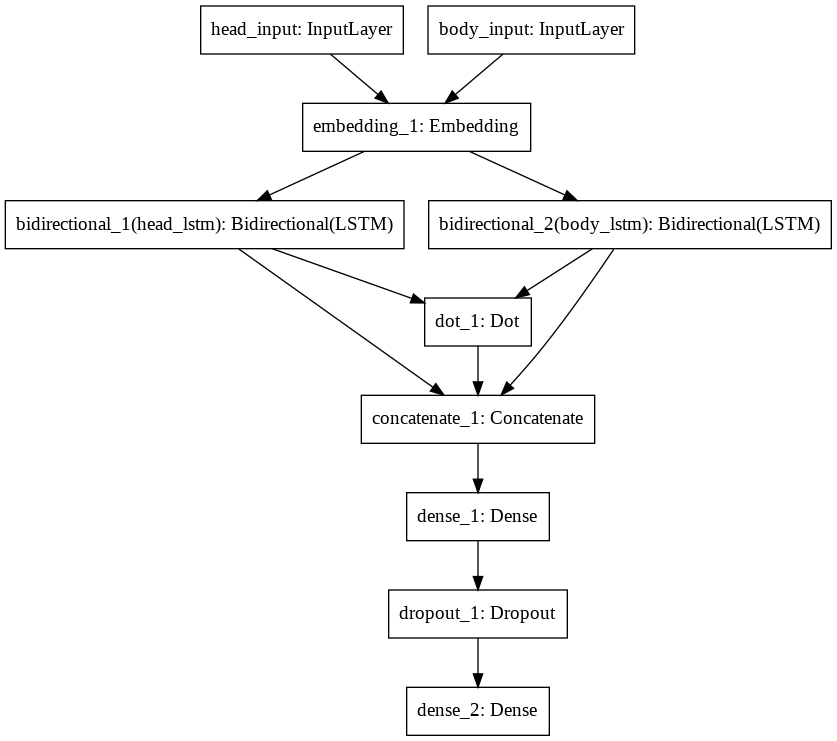

In [58]:
from keras.utils import plot_model
plot_model(model, to_file='model_final.png')

In [0]:
x_train = x_train.reshape(x_train.shape[0], 400)


In [0]:
x_heading_train = x_heading_train.reshape(x_heading_train.shape[0], 20)

In [61]:
x_train.shape

(39977, 400)

In [62]:
x_heading_train.shape

(39977, 20)

In [0]:
x_val = x_val.reshape(x_val.shape[0], 400)

In [0]:
x_heading_val = x_heading_val.reshape(x_heading_val.shape[0], 20)

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [0]:
def evaluate_answer(model,model_inp, true):
    inv_category_dict = {0:'unrelated', 1: 'agree', 2: 'disagree', 3: 'discuss'}
    predicted = model.predict(model_inp)
    predicted = np.argmax(predicted,axis = 1)
    t = np.argmax(true,axis = 1)
    ground = list()
    pred = list()
    for i in predicted:
        pred.append(inv_category_dict[i])
    for i in t:
        ground.append(inv_category_dict[i])
    #score.report_score(ground, pred)
    F1_metric = f1_score(ground, pred, average = 'weighted')
    conf_mat = confusion_matrix(ground, pred)
    return F1_metric, conf_mat

In [0]:
import os

checkpoint_path = project_path + "cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

In [68]:
for i in range(5):
    model.fit([x_heading_train,x_train],[y_train],validation_data = ([x_heading_val,x_val],y_val),epochs=4, batch_size=128,verbose = True,callbacks=[cp_callback])
    print("F1 scores: " , evaluate_answer(model,[x_heading_val,x_val],y_val))

Train on 39977 samples, validate on 9995 samples
Epoch 1/4
39977/39977 [==============================] - 683s 17ms/step - loss: 0.7406 - acc: 0.7389 - val_loss: 0.6120 - val_acc: 0.7624

Epoch 00001: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
Epoch 2/4
39977/39977 [==============================] - 678s 17ms/step - loss: 0.5939 - acc: 0.7729 - val_loss: 0.4999 - val_acc: 0.8098

Epoch 00002: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
Epoch 3/4
39977/39977 [==============================] - 674s 17ms/step - loss: 0.4881 - acc: 0.8117 - val_loss: 0.3856 - val_acc: 0.8547

Epoch 00003: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
Epoch 4/4
39977/39977 [==============================] - 669s 17ms/step - loss: 0.3964 - acc: 0.8476 - val_loss: 0.3119 - val_acc: 0.8833

Epoch 00004: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt


TypeError: ignored

In [73]:
for i in range(5):
    model.fit([x_heading_train,x_train],[y_train],validation_data = ([x_heading_val,x_val],y_val),epochs=4, batch_size=128,verbose = True,callbacks=[cp_callback])
    

Train on 39977 samples, validate on 9995 samples
Epoch 1/4
39977/39977 [==============================] - 673s 17ms/step - loss: 0.3318 - acc: 0.8732 - val_loss: 0.2622 - val_acc: 0.9015

Epoch 00001: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
Epoch 2/4
39977/39977 [==============================] - 661s 17ms/step - loss: 0.2871 - acc: 0.8925 - val_loss: 0.2283 - val_acc: 0.9168

Epoch 00002: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
Epoch 3/4
39977/39977 [==============================] - 661s 17ms/step - loss: 0.2483 - acc: 0.9061 - val_loss: 0.2059 - val_acc: 0.9253

Epoch 00003: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
Epoch 4/4
39977/39977 [==============================] - 675s 17ms/step - loss: 0.2210 - acc: 0.9173 - val_loss: 0.1808 - val_acc: 0.9332

Epoch 00004: saving model to /content/drive/My Drive/Sequence_models/Project_2/cp.ckpt
F1 scores:  (0.9310651773882012, <function conf

KeyboardInterrupt: ignored

In [0]:
  F1_score,conf_matrix = evaluate_answer(model,[x_heading_val,x_val],y_val)

In [79]:
print("F1 score",F1_score)
print("Confusion Matrix", conf_matrix)

F1 score 0.9277856848336404
Confusion Matrix [[  49   36    7   78]
 [   5 1654   58   76]
 [  15  158 7014   85]
 [  28  129   39  564]]


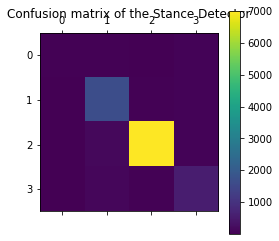

In [80]:
import pylab as pl

pl.matshow(conf_matrix)
pl.title('Confusion matrix of the Stance Detector')
pl.colorbar()
pl.show()

#CONCLUSION

- The model architecture selected used a dot product and concatenaous of the inputs , followed by 2 BILSTMs layers.
After running for 8 epocs  the accuracy metric is 93% for validation and the F1 score is 0.927

Since the accuracy score is good and submission is due not proceeding with attention model. However rest of teh steps of the exercise are completed.

## Build the same model with attention layers included for better performance (Optional)

## Fit the model and report the accuracy score for the model with attention layer (Optional)